In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

## Загрузка файла

In [26]:
data = pd.read_csv('Итоговое_задание/HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Признаки:  
1. **satisfaction_level** - Уровень удавлентворенности работой  
2. **last_evaluation** - Время с момента последней оценки в годах  
3. **number_project** - Количество проектов, выполненных за время работы  
4. **average_montly_hours** - Среднее количество часов на рабочем месте в месяц  
5. **time_spend_company** - Стаж работы в компании в годах  
6. **Work_accident** - Происходили ли несчастные случаи на рабочем месте с сотрудником  
7. **left** - Уволился ли сотрудник  
8. **promotion_last_5years** - Повышался ли сотрудник за последние пять лет  
9. **department** - Отдел в котором работает сотрудник  
10. **salary** - Относительный уровень зарплаты  

## Расчет основных статистик

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [13]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Расчет и визуализация корреляционной матрицы  
#### Коэффициент корреляции Пирсона

/var/folders/xs/yywhsxs13dnc369zl2gzp53m0000gn/T/ipykernel_20933/2591914628.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

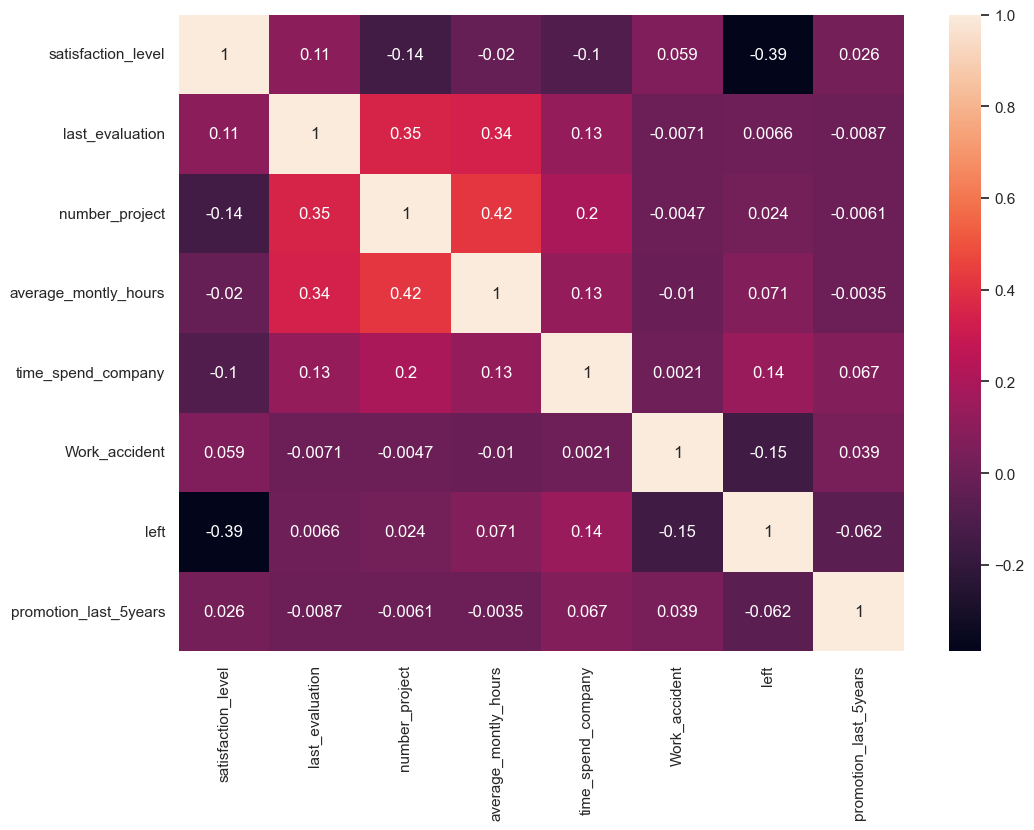

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True)

**Наиболее скоррелированные переменные:** average_montly_hours/number_project и left/satisfaction_level  
**Наименее скоррелированные переменные:** promotion_last_5years/average_montly_hours и number_project/promotion_last_5years

#### Коэффициент корреляции Спирмана

/var/folders/xs/yywhsxs13dnc369zl2gzp53m0000gn/T/ipykernel_20933/2969783146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr('spearman'), annot=True)


<AxesSubplot: >

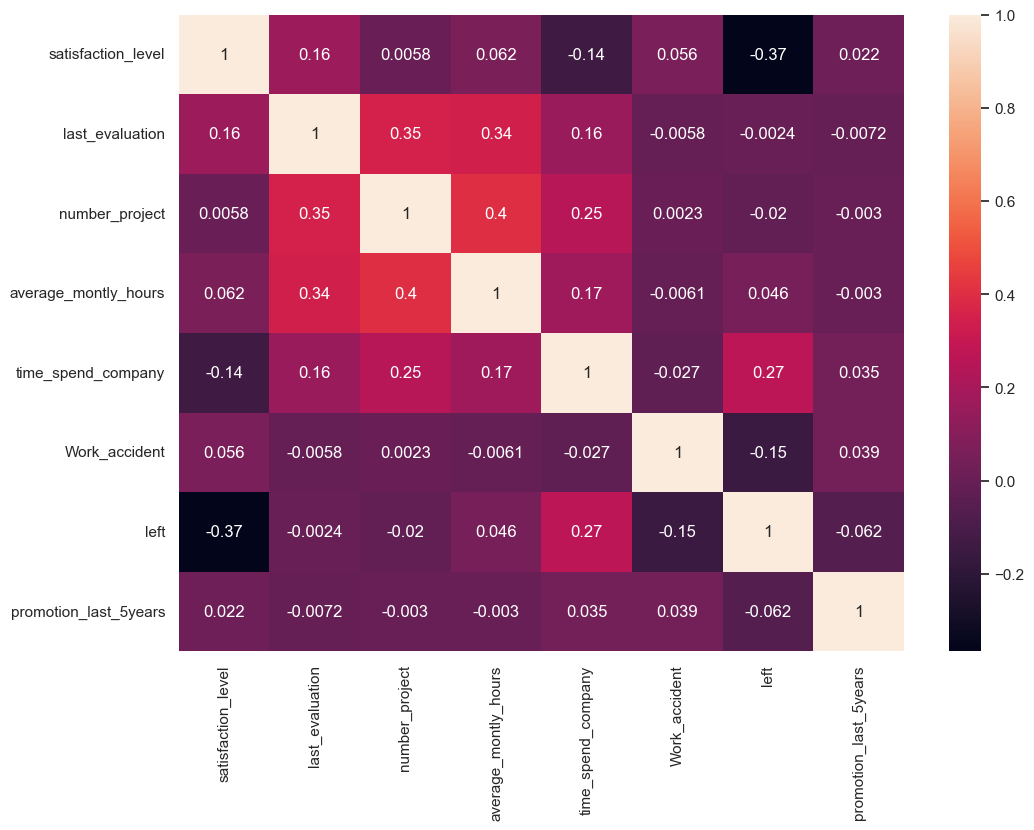

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr('spearman'), annot=True)

#### Коэффициент корреляции Кенделла

/var/folders/xs/yywhsxs13dnc369zl2gzp53m0000gn/T/ipykernel_20933/129546884.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr('kendall'), annot=True)


<AxesSubplot: >

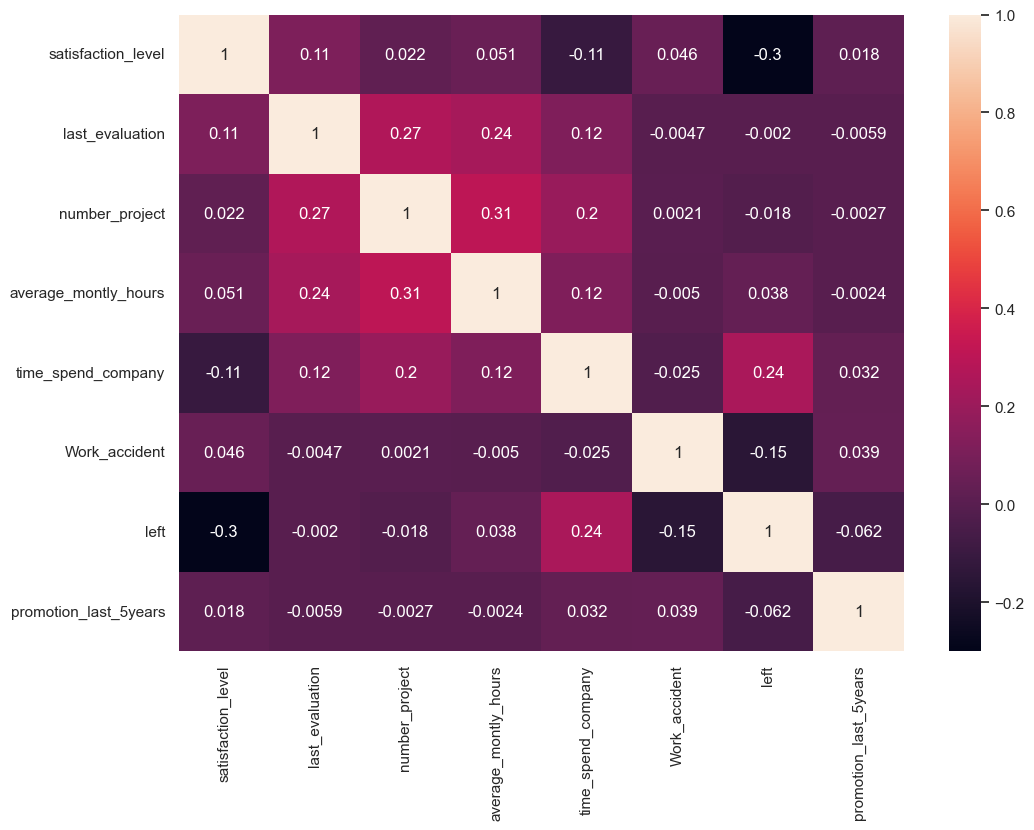

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr('kendall'), annot=True)

## Расчет количества сотрудников по департаментам

In [32]:
department = data.groupby('department').count()
department['satisfaction_level']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

## Распределение сотрудников по зарплатам (общее)

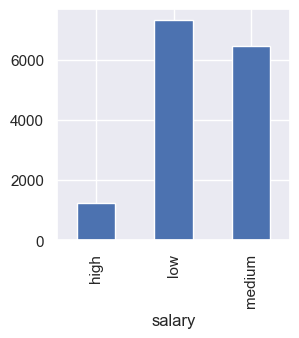

In [60]:
salary = data.groupby('salary').count()
salary['satisfaction_level'].plot(kind='bar', figsize=(3,3))
plt.show()

В общем распределении зарплат сотрудников видно, что низкую и среднюю зарплату получает большинство сотрудников, при этом высокий уровень зарплаты только у примерно 1500 сотрудников

## Распределение сотрудников по зарплатам (по отделам)

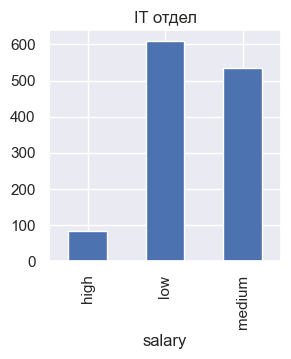

In [74]:
it_dep = data[data['department'] == 'IT'].groupby('salary').count()
it_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='IT отдел')
plt.show()

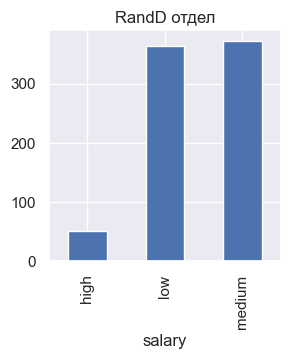

In [69]:
randd_dep = data[data['department'] == 'RandD'].groupby('salary').count()
randd_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='RandD отдел')
plt.show()

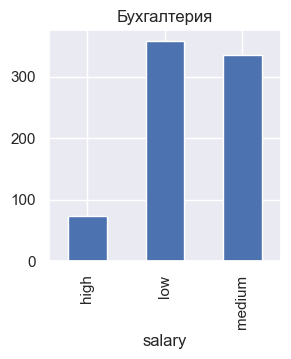

In [70]:
accounting_dep = data[data['department'] == 'accounting'].groupby('salary').count()
accounting_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='Бухгалтерия')
plt.show()

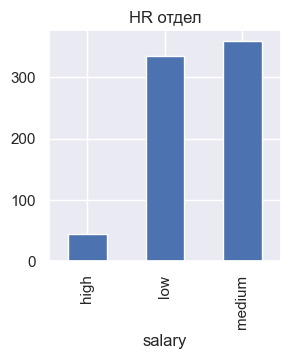

In [71]:
hr_dep = data[data['department'] == 'hr'].groupby('salary').count()
hr_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='HR отдел')
plt.show()

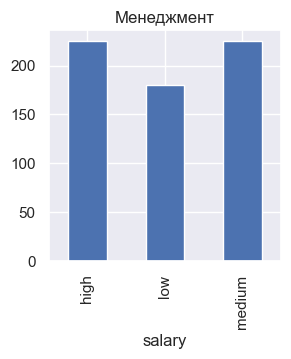

In [72]:
management_dep = data[data['department'] == 'management'].groupby('salary').count()
management_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='Менеджмент')
plt.show()

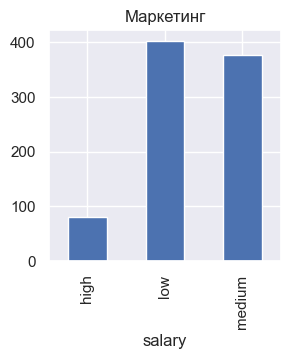

In [75]:
marketing_dep = data[data['department'] == 'marketing'].groupby('salary').count()
marketing_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='Маркетинг')
plt.show()

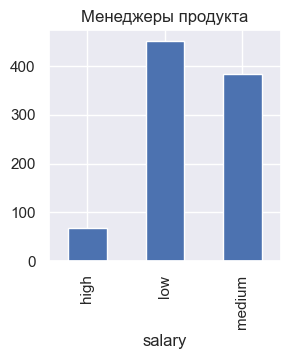

In [76]:
product_mng_dep = data[data['department'] == 'product_mng'].groupby('salary').count()
product_mng_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='Менеджеры продукта')
plt.show()

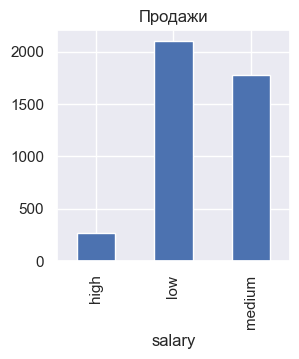

In [77]:
sales_dep = data[data['department'] == 'sales'].groupby('salary').count()
sales_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='Продажи')
plt.show()

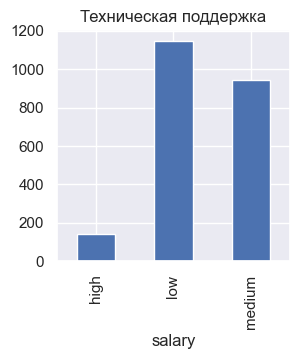

In [78]:
support_dep = data[data['department'] == 'support'].groupby('salary').count()
support_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='Техническая поддержка')
plt.show()

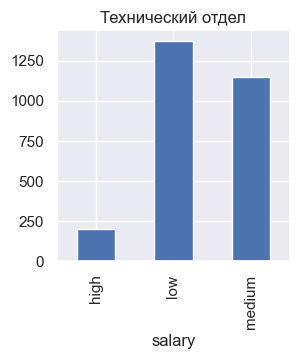

In [79]:
technical_dep = data[data['department'] == 'technical'].groupby('salary').count()
technical_dep['satisfaction_level'].plot(kind='bar', figsize=(3,3), title='Технический отдел')
plt.show()

Распределение зарплат по отделам в целом схожее, отличие только в Менеджерском отделе, где высокий уровень зарплаты составляет почти треть от всех сотрудников отдела

## Гипотеза:  
сотрудники с высоким окладом проводят больше времени на работе, чем сотрудники с низким окладом

#### Сотрудники с высокой зарплатой

In [90]:
high_salary = data[data['salary'] == 'high']

In [92]:
# Расчет среднего времени проведенного в месяц сотрудниками с высоким окладом
high_salary['average_montly_hours'].mean()

199.86742118027485

In [94]:
# Расчет медианного времени проведенного в месяц сотрудниками с высоким окладом
high_salary['average_montly_hours'].median()

199.0

In [95]:
low_salary = data[data['salary'] == 'low']

In [96]:
# Расчет среднего времени проведенного в месяц сотрудниками с низким окладом
low_salary['average_montly_hours'].mean()

200.9965828321487

In [97]:
# Расчет медианного времени проведенного в месяц сотрудниками с высоким окладом
low_salary['average_montly_hours'].median()

199.0

**Вывод**: Сотрудники с высоким окладом в среднем (и согласно медианным значениям) проводят столько же времени сколько и сотрудники с низким окладом

## Расчет показателей для уволившихся сотрудников 

### Доля сотрудников с повышением за последние 5 лет

In [112]:
promoted = data[data['left'] == 1]
promoted = promoted.groupby('promotion_last_5years').count()
promoted['satisfaction_level']

promotion_last_5years
0    3552
1      19
Name: satisfaction_level, dtype: int64

In [110]:
(19/3552)*100

0.5349099099099099

Доля уволившихся сотрудников с повышением за последние 5 лет составляет 0.53%

### Средняя степень удавлетворенности

In [116]:
satisfaction = data[data['left'] == 1]
satisfaction['satisfaction_level'].mean()

0.4400980117614114

Средняя степень удовлетворенности среди уволившихся сотрудников составила 44%

### Среднее количество проектов

In [119]:
project = data[data['left'] == 1]
project['number_project'].mean()

3.8555026603192384

Среднее количество проектов у сотрудника среди уволившихся составила 3.8 (от 3 до 4)

In [120]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Модель линейного дискриминантного анализа

In [121]:
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
         'Work_accident', 'promotion_last_5years']]
y = data['left']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [132]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [133]:
accuracy_score(y_test, LDA.predict(X_test))

0.7536

Качество модели составила 75,4%